In [1]:
# Importing Essential Libraries/Packages
import warnings 
warnings.filterwarnings('ignore')
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from scipy.stats import mannwhitneyu as mw, kruskal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
sns.set_style("white")

# Children, Adolescents, Adults

## Data Wrangling

In [2]:
#Importing Data
x = arff.loadarff("Autism-Adolescent-Data.arff")
x = pd.DataFrame(x[0])
df = x.select_dtypes([np.object]) 
df = df.stack().str.decode('utf-8').unstack()
df['age'] = x['age']
df['result'] = x['result']

x = arff.loadarff("Autism-Child-Data.arff")
x = pd.DataFrame(x[0])
df1 = x.select_dtypes([np.object]) 
df1 = df1.stack().str.decode('utf-8').unstack()
df1['age'] = x['age']
df1['result'] = x['result']

x = arff.loadarff("Autism-Adult-Data.arff")
x = pd.DataFrame(x[0])
df2 = x.select_dtypes([np.object]) 
df2 = df2.stack().str.decode('utf-8').unstack()
df2['age'] = x['age']
df2['result'] = x['result']

In [3]:
# Replacing '?' with NaN
df = df.replace({'?':np.nan})
df1 = df1.replace({'?':np.nan})
df2 = df2.replace({'?':np.nan})

#Dropping Ethnicity and Relation Column
df = df.drop(['ethnicity','relation'],1)
df1= df1.drop(['ethnicity','relation'],1)
df2 = df2.drop(['ethnicity','relation'],1)

#Eliminating Missing values using Forward fill
df1=df1.ffill()
df2=df2.ffill()

In [4]:
df['Age Group']='Adolescent'
df1['Age Group']='Child'
df2['Age Group']='Adult'

df = df.drop(['age_desc'],1)
df1 = df1.drop(['age_desc'],1)
df2= df2.drop(['age_desc'],1)

In [5]:
#Combining Children, Adolescent and Adult data
data = pd.concat([df,df1])
data1 = pd.concat([data,df2])
data1.age =data1.age.astype("int")
data1.to_csv("Combined Data.csv")

In [6]:
#Splitting data for Training, Testing and Evaluation
data1 = data1.drop(['used_app_before','contry_of_res','age','result'],1)
Data1,Data2 = train_test_split(data1,random_state=23,test_size=0.8)
Testing_Data_Features = Data2.drop(['Class/ASD'],1)
Testing_Data_Labels = Data2['Class/ASD']
Data1.to_csv("Training_Data.csv")
Testing_Data_Features.to_csv("Testing Features.csv")
Testing_Data_Labels.to_csv("Actual Values.csv")

In [7]:
data1.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,Class/ASD,Age Group
count,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3
top,1,0,1,1,1,0,0,1,0,1,m,no,no,NO,Adult
freq,769,569,607,583,646,612,575,666,646,684,625,935,946,707,704


## Data Analysis

In [8]:
df = pd.read_csv("Combined Data.csv")
df=df.drop(['Unnamed: 0'],1)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,contry_of_res,used_app_before,Class/ASD,age,result,Age Group
0,0,0,0,1,1,1,1,1,1,0,m,yes,yes,Austria,no,NO,15,6.0,Adolescent
1,0,0,0,0,0,0,0,0,1,1,m,no,no,Austria,no,NO,15,2.0,Adolescent
2,0,0,0,0,0,0,0,0,1,1,f,no,no,AmericanSamoa,no,NO,12,2.0,Adolescent
3,0,1,1,1,1,1,0,1,1,0,f,no,no,United Kingdom,no,YES,14,7.0,Adolescent
4,1,1,1,1,1,1,1,0,0,0,f,no,no,Albania,no,YES,16,7.0,Adolescent


In [9]:
Child = df[df['Age Group'] == "Child"]
Child.describe(include="all")

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,contry_of_res,used_app_before,Class/ASD,age,result,Age Group
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292,292,292,292,292,292,292.000000,292.000000,292
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,52,2,2,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,no,no,United Kingdom,no,NO,NaN,NaN,Child
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208,212,243,49,281,151,NaN,NaN,292
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,NaN,NaN,NaN,NaN,NaN,NaN,6.349315,6.239726,NaN
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,NaN,NaN,NaN,NaN,NaN,NaN,2.353888,2.284882,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,6.000000,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,8.000000,NaN


In [10]:
Adolescent = df[df['Age Group'] == "Adolescent"]
Adolescent.describe(include="all")

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,contry_of_res,used_app_before,Class/ASD,age,result,Age Group
count,104.000000,104.000000,104.000000,104.000000,104.00000,104.000000,104.000000,104.000000,104.000000,104.000000,104,104,104,104,104,104,104.000000,104.000000,104
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,33,2,2,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,no,no,United Kingdom,no,YES,NaN,NaN,Adolescent
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,88,90,29,100,63,NaN,NaN,104
mean,0.730769,0.538462,0.653846,0.701923,0.75000,0.769231,0.519231,0.615385,0.788462,0.653846,NaN,NaN,NaN,NaN,NaN,NaN,14.134615,6.721154,NaN
std,0.445708,0.500933,0.478047,0.459629,0.43511,0.423365,0.502050,0.488860,0.410377,0.478047,NaN,NaN,NaN,NaN,NaN,NaN,1.576882,2.200868,NaN
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.75000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,6.000000,NaN
50%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,7.000000,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,8.000000,NaN


In [11]:
Adult = df[df['Age Group'] == "Adult"]
Adult.describe(include="all")

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,contry_of_res,used_app_before,Class/ASD,age,result,Age Group
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704,704,704,704,704,704,704.000000,704.000000,704
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,67,2,2,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,no,no,United States,no,NO,NaN,NaN,Adult
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367,635,613,113,692,515,NaN,NaN,704
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,NaN,NaN,NaN,NaN,NaN,NaN,29.666193,4.875000,NaN
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,NaN,NaN,NaN,NaN,NaN,NaN,16.494948,2.501493,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,3.000000,NaN
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,4.000000,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,7.000000,NaN


In [12]:
#Point Biserial
x_1 = df['A1_Score'].to_list()
x_2 = df['A2_Score'].to_list()
x_3 = df['A3_Score'].to_list()
x_4 = df['A4_Score'].to_list()
x_5 = df['A5_Score'].to_list()
x_6 = df['A6_Score'].to_list()
x_7 = df['A7_Score'].to_list()
x_8 = df['A8_Score'].to_list()
x_9 = df['A9_Score'].to_list()
x_10 = df['A10_Score'].to_list()


y = df['result'].to_list()

import scipy.stats as stats
print (stats.pointbiserialr(x_1, y))
print (stats.pointbiserialr(x_2, y))
print (stats.pointbiserialr(x_3, y))
print (stats.pointbiserialr(x_4, y))
print (stats.pointbiserialr(x_5, y))
print (stats.pointbiserialr(x_6, y))
print (stats.pointbiserialr(x_7, y))
print (stats.pointbiserialr(x_8, y))
print (stats.pointbiserialr(x_9, y))
print (stats.pointbiserialr(x_10, y))

PointbiserialrResult(correlation=0.3530743745551161, pvalue=1.2178148811209245e-33)
PointbiserialrResult(correlation=0.3752895253875461, pvalue=4.081618547485807e-38)
PointbiserialrResult(correlation=0.569658826449492, pvalue=1.2175323837932664e-95)
PointbiserialrResult(correlation=0.5942488012281669, pvalue=5.556309480906608e-106)
PointbiserialrResult(correlation=0.6127155056415028, pvalue=2.3516245832444572e-114)
PointbiserialrResult(correlation=0.6529323746035678, pvalue=1.1899470029445896e-134)
PointbiserialrResult(correlation=0.4436215114746039, pvalue=3.027808545043665e-54)
PointbiserialrResult(correlation=0.33827494051766793, pvalue=7.492965878809118e-31)
PointbiserialrResult(correlation=0.6581542919313463, pvalue=1.6200601926437345e-137)
PointbiserialrResult(correlation=0.527925484094148, pvalue=5.778842045806581e-80)


gender       f    m   All
Class/ASD                
NO         298  409   707
YES        177  216   393
All        475  625  1100
(0.7451256059429043, 0.3880238945962061, 1, array([[305.29545455, 401.70454545],
       [169.70454545, 223.29545455]]))

jundice     no  yes   All
Class/ASD                
NO         616   91   707
YES        319   74   393
All        935  165  1100
(6.573497814211464, 0.010350832669945322, 1, array([[600.95, 106.05],
       [334.05,  58.95]]))

austim      no  yes   All
Class/ASD                
NO         625   82   707
YES        321   72   393
All        946  154  1100
(8.930353467131713, 0.0028047006325580427, 1, array([[608.02,  98.98],
       [337.98,  55.02]]))


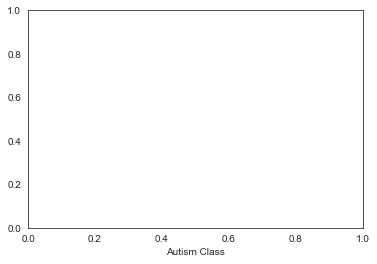

In [13]:
#Chi Square Test of Independence

cross_tab1 = pd.crosstab(df['Class/ASD'],df.gender,margins=True)
print (cross_tab1)
cross_tab2= pd.crosstab(df['Class/ASD'],df.gender)
print (stats.chi2_contingency(cross_tab2))
plt.xlabel("Autism Class")
print ()

cross_tab1 = pd.crosstab(df['Class/ASD'],df.jundice,margins=True)
print (cross_tab1)
cross_tab2= pd.crosstab(df['Class/ASD'],df.jundice)
print (stats.chi2_contingency(cross_tab2))
print ()

cross_tab1 = pd.crosstab(df['Class/ASD'],df.austim,margins=True)
print (cross_tab1)
cross_tab2= pd.crosstab(df['Class/ASD'],df.austim)

print (stats.chi2_contingency(cross_tab2))

## Modelling

In [14]:
df = pd.read_csv("Training_Data.csv")

In [15]:
df = df.drop(['Unnamed: 0'],1)

In [16]:
qualitative = df[['gender','jundice','austim','Age Group']]

In [17]:
nominal_data = pd.get_dummies(qualitative)

In [18]:
df = df.drop(['gender','jundice','austim','Age Group'],1)

In [19]:
data = pd.concat([nominal_data,df],1)

In [20]:
X = data.drop(['Class/ASD'],1)
y = data[['Class/ASD']]
y = y.replace({'NO':0,'YES':1})

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
dftest = pd.read_csv("Testing Features.csv")

dftest = dftest.drop(['Unnamed: 0'],1)

qualitative = dftest[['gender','jundice','austim','Age Group']]

nominal_data = pd.get_dummies(qualitative)

dftest = dftest.drop(['gender','jundice','austim','Age Group'],1)

datatest = pd.concat([nominal_data,dftest],1)

true_values = pd.read_csv("Actual Values.csv")
true_values = true_values.drop(['Unnamed: 0'],1)
true_values = true_values.replace({"NO":0,"YES":1})

### Naive Bayes - Bernoulli

Accuracy Score:  0.8909090909090909
ROC AUC Score:  0.8915343915343916
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.86      0.93      0.89        27

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



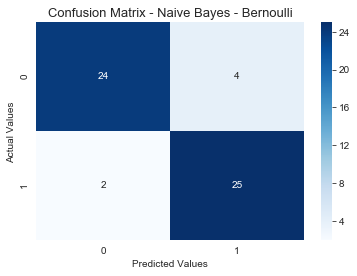

In [23]:
naive = BernoulliNB().fit(X_train,y_train)
prediction = naive.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix1 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix1, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Naive Bayes - Bernoulli", fontsize=13)
plt.show()

### K Neighbors Classifier

Accuracy Score:  0.8181818181818182
ROC AUC Score:  0.8233333333333333
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.76      0.88      0.81        25

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.83      0.82      0.82        55



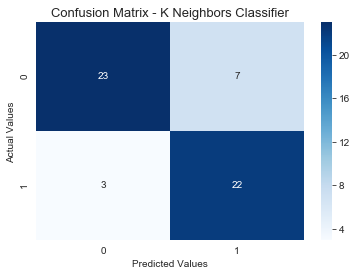

In [24]:
knn = KNeighborsClassifier().fit(X_train,y_train)
prediction = knn.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix2 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix2, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - K Neighbors Classifier", fontsize=13)
plt.show()

### Logistic Regression

Accuracy Score:  0.9454545454545454
ROC AUC Score:  0.9451058201058201
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.93      0.96      0.95        28

    accuracy                           0.95        55
   macro avg       0.95      0.95      0.95        55
weighted avg       0.95      0.95      0.95        55



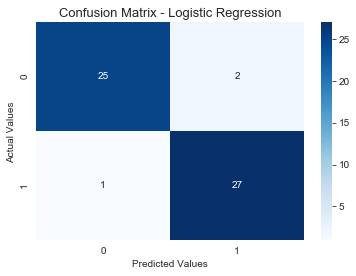

In [25]:
logit = LogisticRegression(random_state=100).fit(X_train,y_train)
prediction = logit.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix3 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix3, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.title("Confusion Matrix - Logistic Regression", fontsize=13)
ax.set_ylim([2,0])
plt.show()

### Decision Tree Classifier

Accuracy Score:  0.7636363636363637
ROC AUC Score:  0.7715053763440861
Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        31
           1       0.69      0.83      0.75        24

    accuracy                           0.76        55
   macro avg       0.77      0.77      0.76        55
weighted avg       0.78      0.76      0.76        55



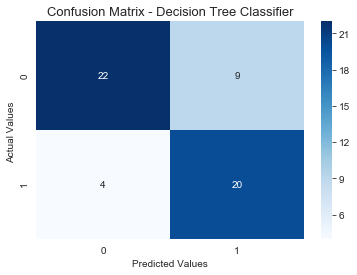

In [26]:
tree = DecisionTreeClassifier(random_state=100).fit(X_train,y_train)
prediction = tree.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix4 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix4, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Decision Tree Classifier", fontsize=13)
plt.show()

## Ensemble Models

### Gradient Boosting Classifier

Accuracy Score:  0.8181818181818182
ROC AUC Score:  0.8233333333333333
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.76      0.88      0.81        25

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.83      0.82      0.82        55



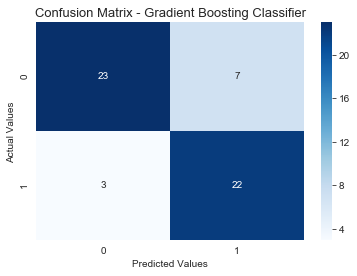

In [27]:
boost = GradientBoostingClassifier(random_state=1000).fit(X_train,y_train)
prediction = boost.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix5 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix5, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Gradient Boosting Classifier", fontsize=13)

plt.show()

### Random Forest Classifier

Accuracy Score:  0.8
ROC AUC Score:  0.8321428571428571
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.71      0.82        35
           1       0.66      0.95      0.78        20

    accuracy                           0.80        55
   macro avg       0.81      0.83      0.80        55
weighted avg       0.85      0.80      0.80        55



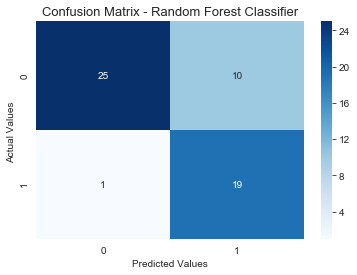

In [28]:
forest = RandomForestClassifier(random_state=10).fit(X_train,y_train)
prediction = forest.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix6 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix6, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Random Forest Classifier", fontsize=13)
plt.show()

### Ada Boost Classifier

Accuracy Score:  0.9818181818181818
ROC AUC Score:  0.9814814814814815
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.97      1.00      0.98        28

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



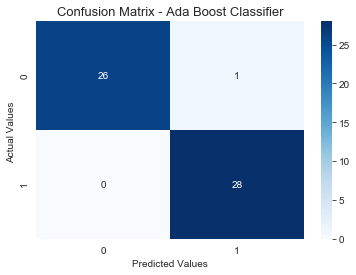

In [29]:
ada = AdaBoostClassifier(random_state=100)
ada.fit(X_train,y_train)
prediction = ada.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix7 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix7, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Ada Boost Classifier", fontsize=13)
plt.show()

## Evaluating Best Models on Test Data

### AdaBoost

Accuracy Score:  0.990909090909091
ROC AUC Score:  0.9908059688055638
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       566
           1       0.98      0.99      0.99       314

    accuracy                           0.99       880
   macro avg       0.99      0.99      0.99       880
weighted avg       0.99      0.99      0.99       880



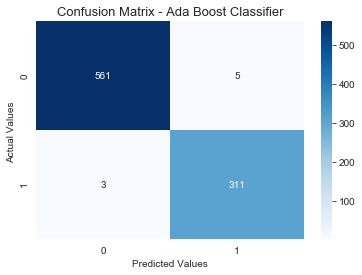

In [30]:
prediction = ada.predict(datatest)
print ("Accuracy Score: ",accuracy_score(prediction,true_values))
print ("ROC AUC Score: ", roc_auc_score(prediction,true_values))

print ("Classification Report :")
print(classification_report(prediction,true_values))

clf_matrixa = confusion_matrix(prediction,true_values)
ax = sns.heatmap(clf_matrixa, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Ada Boost Classifier", fontsize=13)
plt.show()

### Logistic Regression

Accuracy Score:  0.9727272727272728
ROC AUC Score:  0.9716504153123873
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       568
           1       0.96      0.97      0.96       312

    accuracy                           0.97       880
   macro avg       0.97      0.97      0.97       880
weighted avg       0.97      0.97      0.97       880



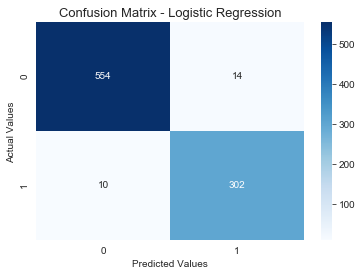

In [31]:
prediction = logit.predict(datatest)
print ("Accuracy Score: ",accuracy_score(prediction,true_values))
print ("ROC AUC Score: ", roc_auc_score(prediction,true_values))

print ("Classification Report :")
print(classification_report(prediction,true_values))

clf_matrixb = confusion_matrix(prediction,true_values)
ax = sns.heatmap(clf_matrixb, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Logistic Regression", fontsize=13)
plt.show()

## Naive Bayes

Accuracy Score:  0.9068181818181819
ROC AUC Score:  0.8948715723707046
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       536
           1       0.91      0.84      0.88       344

    accuracy                           0.91       880
   macro avg       0.91      0.89      0.90       880
weighted avg       0.91      0.91      0.91       880



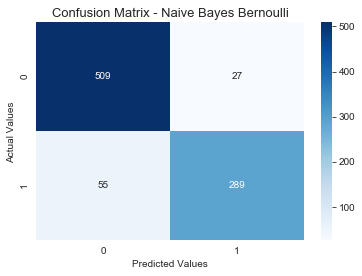

In [32]:
prediction = naive.predict(datatest)
print ("Accuracy Score: ",accuracy_score(prediction,true_values))
print ("ROC AUC Score: ", roc_auc_score(prediction,true_values))

print ("Classification Report :")
print(classification_report(prediction,true_values))

clf_matrixc = confusion_matrix(prediction,true_values)
ax = sns.heatmap(clf_matrixc, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Naive Bayes Bernoulli", fontsize=13)
plt.show()

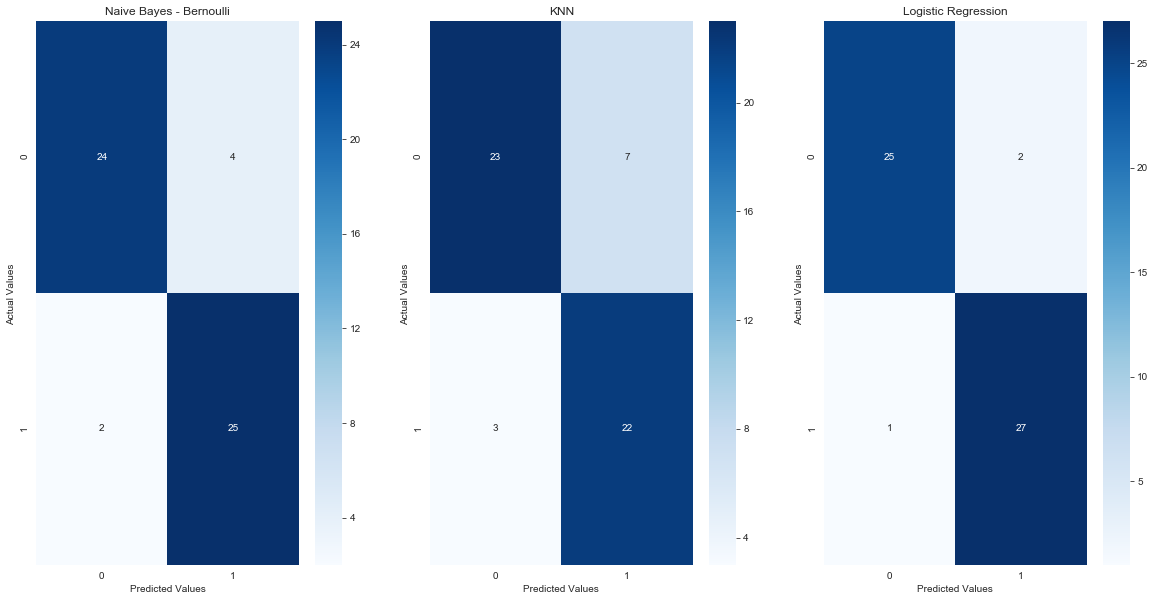

In [33]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 3)
sns.heatmap(clf_matrix1,annot=True,cmap='Blues',fmt='g',ax=ax[0])
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values ')
ax[0].set_ylim([2,0])
ax[0].set_title("Naive Bayes - Bernoulli")

sns.heatmap(clf_matrix2,annot=True,cmap='Blues',fmt='g',ax=ax[1])
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Actual Values ')
ax[1].set_ylim([2,0])
ax[1].set_title("KNN")

sns.heatmap(clf_matrix3,annot=True,cmap='Blues',fmt='g',ax=ax[2])
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Actual Values ')
ax[2].set_ylim([2,0])
ax[2].set_title("Logistic Regression")
plt.show()

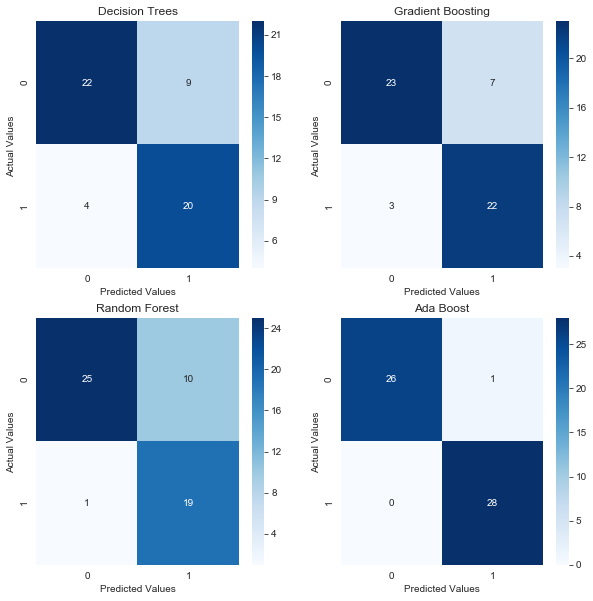

In [34]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2, 2)
sns.heatmap(clf_matrix4,annot=True,cmap='Blues',fmt='g',ax=ax[0][0])
ax[0][0].set_xlabel('Predicted Values')
ax[0][0].set_ylabel('Actual Values ')
ax[0][0].set_ylim([2,0])
ax[0][0].set_title("Decision Trees")

sns.heatmap(clf_matrix5,annot=True,cmap='Blues',fmt='g',ax=ax[0][1])
ax[0][1].set_xlabel('Predicted Values')
ax[0][1].set_ylabel('Actual Values ')
ax[0][1].set_ylim([2,0])
ax[0][1].set_title("Gradient Boosting")

sns.heatmap(clf_matrix6,annot=True,cmap='Blues',fmt='g',ax=ax[1][0])
ax[1][0].set_xlabel('Predicted Values')
ax[1][0].set_ylabel('Actual Values ')
ax[1][0].set_ylim([2,0])
ax[1][0].set_title("Random Forest")

sns.heatmap(clf_matrix7,annot=True,cmap='Blues',fmt='g',ax=ax[1][1])
ax[1][1].set_xlabel('Predicted Values')
ax[1][1].set_ylabel('Actual Values ')
ax[1][1].set_ylim([2,0])
ax[1][1].set_title("Ada Boost")

plt.show()

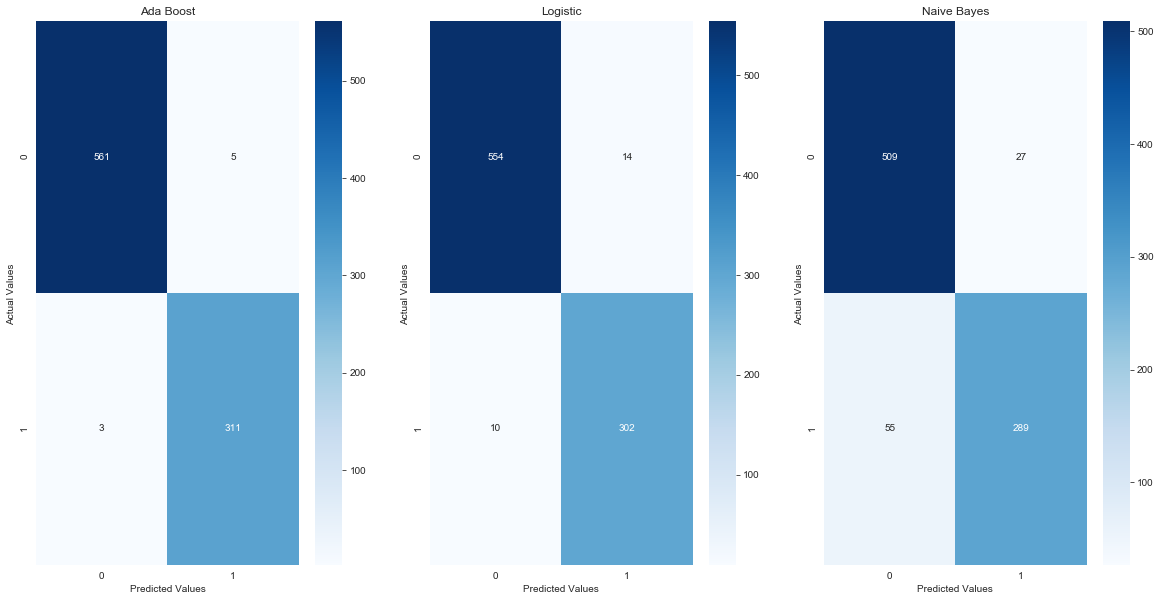

In [35]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 3)
sns.heatmap(clf_matrixa,annot=True,cmap='Blues',fmt='g',ax=ax[0])
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values ')
ax[0].set_ylim([2,0])
ax[0].set_title("Ada Boost")

sns.heatmap(clf_matrixb,annot=True,cmap='Blues',fmt='g',ax=ax[1])
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Actual Values ')
ax[1].set_ylim([2,0])
ax[1].set_title("Logistic")

sns.heatmap(clf_matrixc,annot=True,cmap='Blues',fmt='g',ax=ax[2])
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Actual Values ')
ax[2].set_ylim([2,0])
ax[2].set_title("Naive Bayes")
plt.show()

# Toddlers

## Data Wrangling

In [36]:
df = pd.read_csv("Toddler Autism.csv")

Toddler=df

df = df.replace({'?':np.nan})

df.head()

conditions = [
    (df['Age_Mons'] < 12),
    (df['Age_Mons'] >= 12) & (df['Age_Mons'] < 24),
    (df['Age_Mons'] >= 24) & (df['Age_Mons'] <= 35),
    (df['Age_Mons'] >= 36)
    ]

# create a list of the values we want to assign for each condition
values = ['Less than 1 year', '1 year', '2 years', '3 years']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Age_Years'] = np.select(conditions, values)

# display updated DataFrame
df.head()

df = df.drop(['Ethnicity','Who completed the test'],1)
data1=df

In [37]:
# Dividing the Data for Training,Testing and Evaluation

data1 = data1.drop(['Qchat-10-Score'],1)
Data1,Data2 = train_test_split(data1,random_state=23,test_size=0.8)

Testing_Data_Features = Data2.drop(['Class/ASD Traits '],1)
Testing_Data_Labels = Data2['Class/ASD Traits ']

Data1.to_csv("Training_Data_Toddlers.csv")
Testing_Data_Features.to_csv("Testing Features_Toddlers.csv")
Testing_Data_Labels.to_csv("Actual Values_Toddlers.csv")

## Analysis

In [38]:
df.drop(['Case_No'],1).describe(include="all")

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits,Age_Years
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054,1054,1054,1054,1054
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,no,no,Yes,2 years
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,766,884,728,448
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524,NaN,NaN,NaN,NaN,NaN
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000,NaN,NaN,NaN,NaN,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000,NaN,NaN,NaN,NaN,NaN


In [39]:
#Chi Square Test of Independence
stuff1 = pd.crosstab(df['Class/ASD Traits '],df.Sex,margins=True)
print (stuff1)
stuff2= pd.crosstab(df['Class/ASD Traits '],df.Sex)
print (stats.chi2_contingency(stuff2))
print()

stuff1 = pd.crosstab(df['Class/ASD Traits '],df.Jaundice,margins=True)
print (stuff1)
stuff2= pd.crosstab(df['Class/ASD Traits '],df.Jaundice)
print (stats.chi2_contingency(stuff2))
print ()

stuff1 = pd.crosstab(df['Class/ASD Traits '],df.Family_mem_with_ASD,margins=True)
print (stuff1)
stuff2= pd.crosstab(df['Class/ASD Traits '],df.Family_mem_with_ASD)
print (stats.chi2_contingency(stuff2))

Sex                  f    m   All
Class/ASD Traits                 
No                 125  201   326
Yes                194  534   728
All                319  735  1054
(14.043552857652816, 0.00017862515488223135, 1, array([[ 98.66603416, 227.33396584],
       [220.33396584, 507.66603416]]))

Jaundice            no  yes   All
Class/ASD Traits                 
No                 253   73   326
Yes                513  215   728
All                766  288  1054
(5.427049463011407, 0.01982715111438994, 1, array([[236.92220114,  89.07779886],
       [529.07779886, 198.92220114]]))

Family_mem_with_ASD   no  yes   All
Class/ASD Traits                   
No                   271   55   326
Yes                  613  115   728
All                  884  170  1054
(0.12094341035321472, 0.7280135289450824, 1, array([[273.41935484,  52.58064516],
       [610.58064516, 117.41935484]]))


In [40]:
#Point Biserial Correlation

x_1 = df['A1'].to_list()
x_2 = df['A2'].to_list()
x_3 = df['A3'].to_list()
x_4 = df['A4'].to_list()
x_5 = df['A5'].to_list()
x_6 = df['A6'].to_list()
x_7 = df['A7'].to_list()
x_8 = df['A8'].to_list()
x_9 = df['A9'].to_list()
x_10 = df['A10'].to_list()

y = df['Qchat-10-Score'].to_list()

import scipy.stats as stats
print (stats.pointbiserialr(x_1, y))
print (stats.pointbiserialr(x_2, y))
print (stats.pointbiserialr(x_3, y))
print (stats.pointbiserialr(x_4, y))
print (stats.pointbiserialr(x_5, y))
print (stats.pointbiserialr(x_6, y))
print (stats.pointbiserialr(x_7, y))
print (stats.pointbiserialr(x_8, y))
print (stats.pointbiserialr(x_9, y))
print (stats.pointbiserialr(x_10, y))

PointbiserialrResult(correlation=0.6140643319511778, pvalue=2.986385670707333e-110)
PointbiserialrResult(correlation=0.5924242568568402, pvalue=7.412064315841211e-101)
PointbiserialrResult(correlation=0.5928854792047528, pvalue=4.754492561737791e-101)
PointbiserialrResult(correlation=0.6428904951271778, pvalue=5.831536961225739e-124)
PointbiserialrResult(correlation=0.6495175904463654, pvalue=2.52270469365826e-127)
PointbiserialrResult(correlation=0.6593768207732366, pvalue=1.7316880161811092e-132)
PointbiserialrResult(correlation=0.6190531854633525, pvalue=1.6011546883738535e-112)
PointbiserialrResult(correlation=0.5432286364628541, pvalue=5.899245223462759e-82)
PointbiserialrResult(correlation=0.6716383212228927, pvalue=3.447076652700398e-139)
PointbiserialrResult(correlation=0.29014519670587713, pvalue=6.837693412126447e-22)


## Modelling

In [41]:
df = pd.read_csv("Training_Data_Toddlers.csv")
df = df.drop(['Unnamed: 0','Age_Mons','Case_No'],1)

In [42]:
qualitative = df[['Sex','Jaundice','Family_mem_with_ASD','Age_Years']]

In [43]:
nominal_data = pd.get_dummies(qualitative)

In [44]:
df = df.drop(['Sex','Jaundice','Family_mem_with_ASD','Age_Years'],1)

In [45]:
data = pd.concat([nominal_data,df],1)

In [46]:
X = data.drop(['Class/ASD Traits '],1)
y = data[['Class/ASD Traits ']]
y = y.replace({'No':0,'Yes':1})

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [48]:
dftest = pd.read_csv("Testing Features_Toddlers.csv")

dftest = dftest.drop(['Unnamed: 0','Age_Mons','Case_No'],1)

qualitative = dftest[['Sex','Jaundice','Family_mem_with_ASD','Age_Years']]

nominal_data = pd.get_dummies(qualitative)

dftest = dftest.drop(['Sex','Jaundice','Family_mem_with_ASD','Age_Years'],1)

datatest = pd.concat([nominal_data,dftest],1)

true_values = pd.read_csv("Actual Values_Toddlers.csv")
true_values = true_values.drop(['Unnamed: 0'],1)
true_values = true_values.replace({"No":0,"Yes":1})

### Naive Bayes - Bernoulli

Accuracy Score:  0.9811320754716981
ROC AUC Score:  0.9857142857142858
Classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.97      0.99        35

    accuracy                           0.98        53
   macro avg       0.97      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



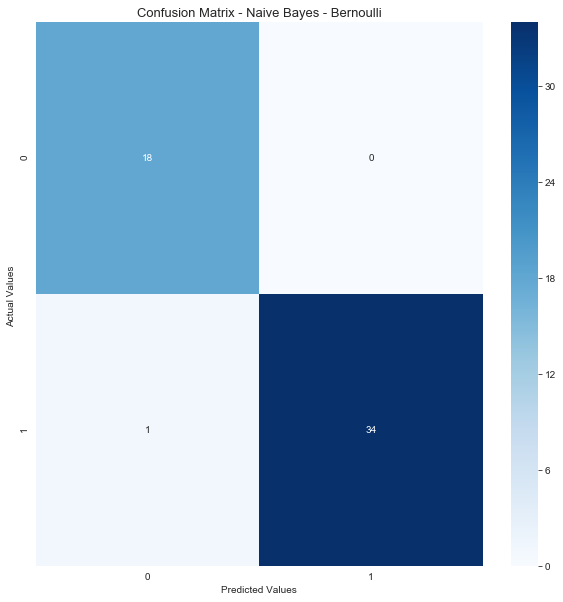

[[18  0]
 [ 1 34]]


In [49]:
plt.rcParams["figure.figsize"] = (10,10)
naive = BernoulliNB().fit(X_train,y_train)
prediction = naive.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix0 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix0, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Naive Bayes - Bernoulli", fontsize=13)
plt.show()
print (clf_matrix0)

### K Neighbors Classifier

Accuracy Score:  0.9245283018867925
ROC AUC Score:  0.9289215686274509
Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.97      0.92      0.94        36

    accuracy                           0.92        53
   macro avg       0.91      0.93      0.92        53
weighted avg       0.93      0.92      0.93        53



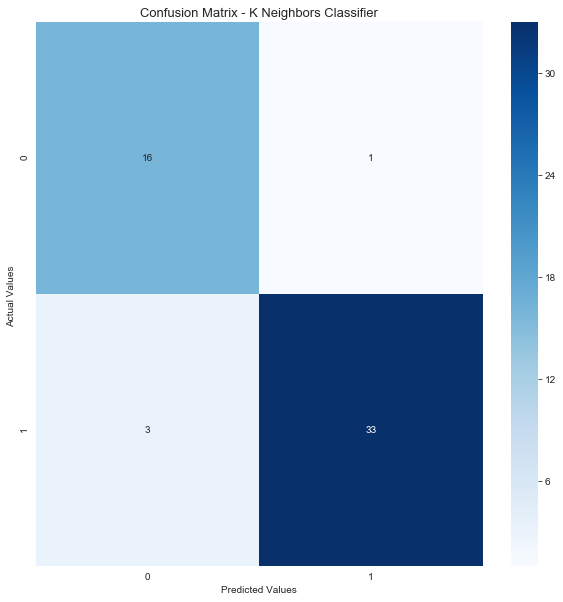

In [50]:
knn = KNeighborsClassifier().fit(X_train,y_train)
prediction = knn.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix1 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix1, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - K Neighbors Classifier", fontsize=13)
plt.show()

### Logistic Regression

Accuracy Score:  0.9433962264150944
ROC AUC Score:  0.9594594594594594
Classification Report :
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.92      0.96        37

    accuracy                           0.94        53
   macro avg       0.92      0.96      0.94        53
weighted avg       0.95      0.94      0.94        53



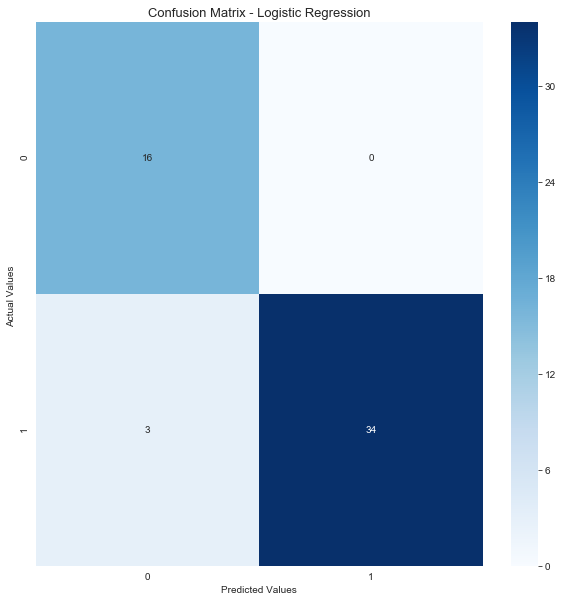

In [51]:
logit = LogisticRegression(random_state=100).fit(X_train,y_train)
prediction = logit.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix2 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix2, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.title("Confusion Matrix - Logistic Regression", fontsize=13)
ax.set_ylim([2,0])
plt.show()

### Decision Tree Classifier

Accuracy Score:  0.9056603773584906
ROC AUC Score:  0.9015873015873015
Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.94      0.91      0.93        35

    accuracy                           0.91        53
   macro avg       0.89      0.90      0.90        53
weighted avg       0.91      0.91      0.91        53



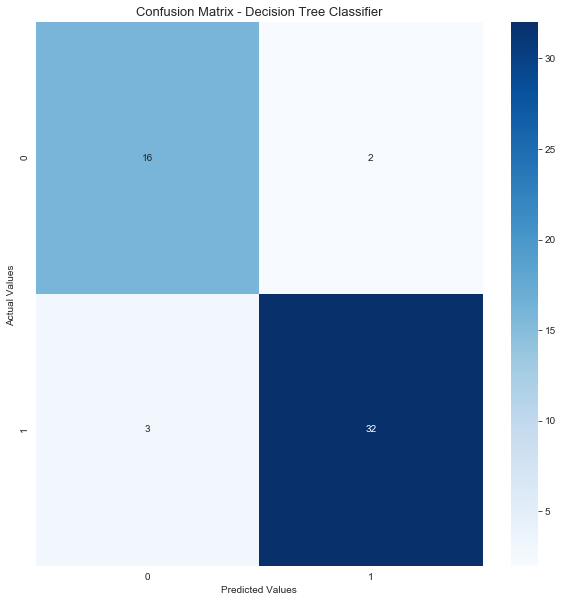

In [52]:
tree = DecisionTreeClassifier(random_state=100).fit(X_train,y_train)
prediction = tree.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix3 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix3, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Decision Tree Classifier", fontsize=13)
plt.show()

## Ensemble Models

### Gradient Boosting Classifier

Accuracy Score:  0.9245283018867925
ROC AUC Score:  0.9473684210526316
Classification Report :
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.89      0.94        38

    accuracy                           0.92        53
   macro avg       0.89      0.95      0.91        53
weighted avg       0.94      0.92      0.93        53



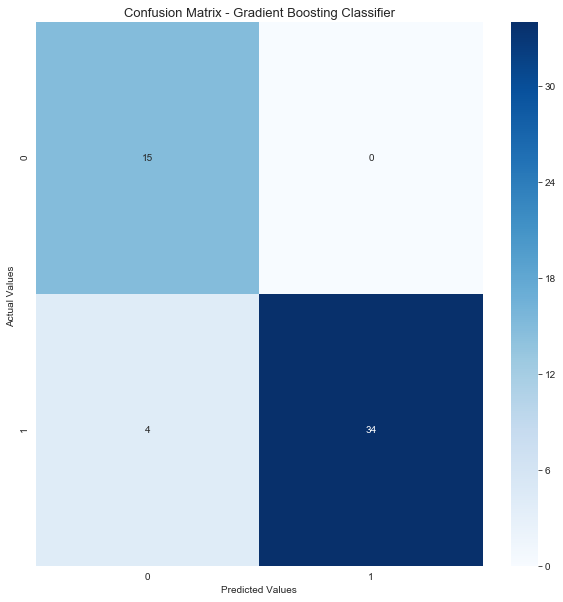

In [53]:
boost = GradientBoostingClassifier(random_state=1000).fit(X_train,y_train)
prediction = boost.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix4 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix4, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Gradient Boosting Classifier", fontsize=13)

plt.show()

### Random Forest Classifier

Accuracy Score:  0.9245283018867925
ROC AUC Score:  0.9473684210526316
Classification Report :
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.89      0.94        38

    accuracy                           0.92        53
   macro avg       0.89      0.95      0.91        53
weighted avg       0.94      0.92      0.93        53



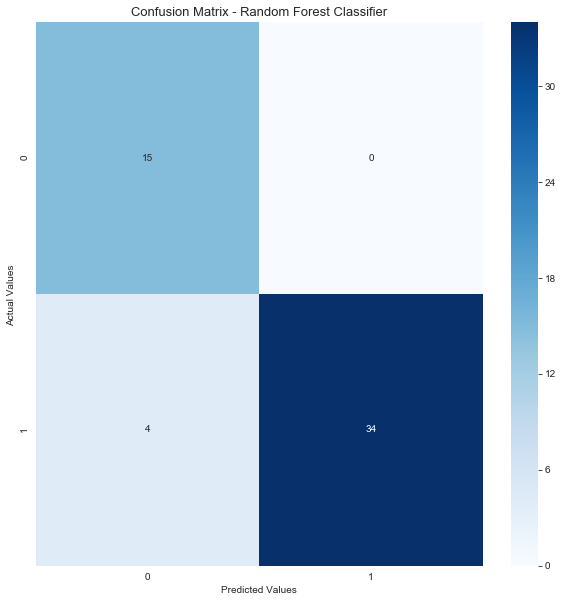

In [54]:
forest = RandomForestClassifier(random_state=10).fit(X_train,y_train)
prediction = forest.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix5 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix5, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Random Forest Classifier", fontsize=13)
plt.show()

### Ada Boost Classifier

Accuracy Score:  0.9433962264150944
ROC AUC Score:  0.9436507936507936
Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.97      0.94      0.96        35

    accuracy                           0.94        53
   macro avg       0.93      0.94      0.94        53
weighted avg       0.94      0.94      0.94        53



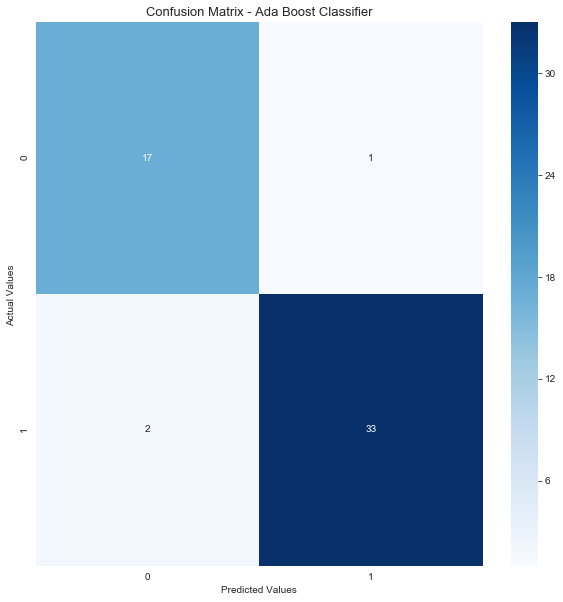

In [55]:
ada = AdaBoostClassifier(random_state=100)
ada.fit(X_train,y_train)
prediction = ada.predict(X_test)
print ("Accuracy Score: ",accuracy_score(prediction,y_test))
print ("ROC AUC Score: ", roc_auc_score(prediction,y_test))

print ("Classification Report :")
print(classification_report(prediction,y_test))

clf_matrix6 = confusion_matrix(prediction,y_test)
ax = sns.heatmap(clf_matrix6, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Ada Boost Classifier", fontsize=13)
plt.show()

## Evaluating Best Models on Test Data

### AdaBoost

Accuracy Score:  0.9680094786729858
ROC AUC Score:  0.9631633482857218
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       262
           1       0.98      0.98      0.98       582

    accuracy                           0.97       844
   macro avg       0.96      0.96      0.96       844
weighted avg       0.97      0.97      0.97       844



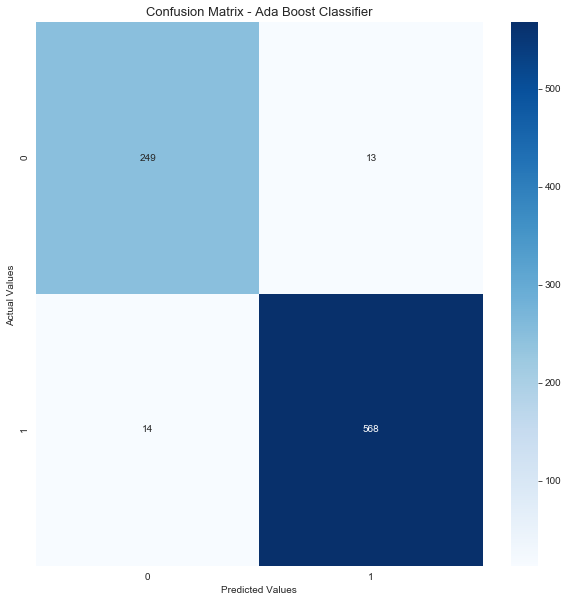

In [56]:
prediction = ada.predict(datatest)
print ("Accuracy Score: ",accuracy_score(prediction,true_values))
print ("ROC AUC Score: ", roc_auc_score(prediction,true_values))

print ("Classification Report :")
print(classification_report(prediction,true_values))

clf_matrixa = confusion_matrix(prediction,true_values)
ax = sns.heatmap(clf_matrixa, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Ada Boost Classifier", fontsize=13)
plt.show()

### Logistic Regression

Accuracy Score:  0.976303317535545
ROC AUC Score:  0.9774282217451495
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       253
           1       0.99      0.97      0.98       591

    accuracy                           0.98       844
   macro avg       0.97      0.98      0.97       844
weighted avg       0.98      0.98      0.98       844



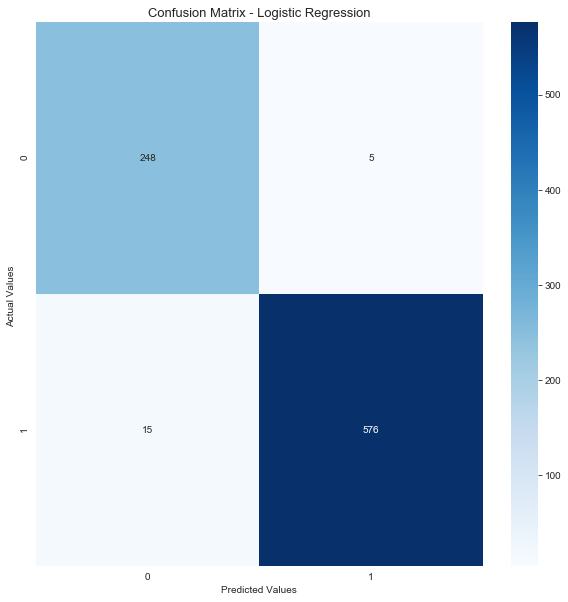

In [57]:
prediction = logit.predict(datatest)
print ("Accuracy Score: ",accuracy_score(prediction,true_values))
print ("ROC AUC Score: ", roc_auc_score(prediction,true_values))

print ("Classification Report :")
print(classification_report(prediction,true_values))

clf_matrixb = confusion_matrix(prediction,true_values)
ax = sns.heatmap(clf_matrixb, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Logistic Regression", fontsize=13)
plt.show()

### Naive Bayes - Bernoulli

Accuracy Score:  0.966824644549763
ROC AUC Score:  0.9552637421892347
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       279
           1       0.96      0.99      0.98       565

    accuracy                           0.97       844
   macro avg       0.97      0.96      0.96       844
weighted avg       0.97      0.97      0.97       844



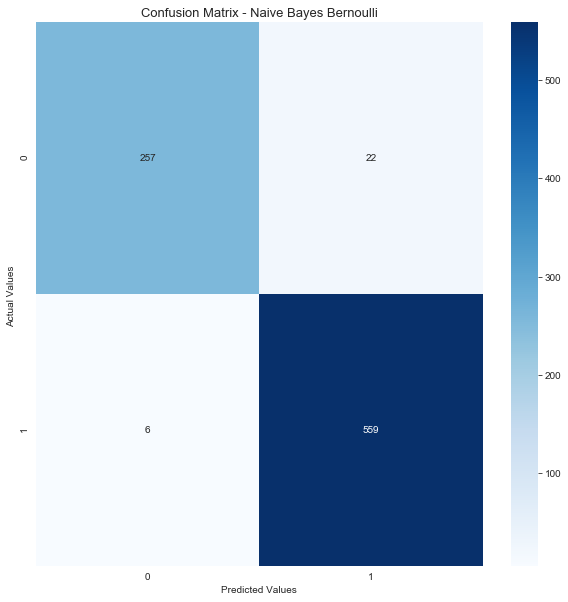

In [58]:
prediction = naive.predict(datatest)
print ("Accuracy Score: ",accuracy_score(prediction,true_values))
print ("ROC AUC Score: ", roc_auc_score(prediction,true_values))

print ("Classification Report :")
print(classification_report(prediction,true_values))

clf_matrixc = confusion_matrix(prediction,true_values)
ax = sns.heatmap(clf_matrixc, annot=True, cmap='Blues',fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.set_ylim([2,0])
plt.title("Confusion Matrix - Naive Bayes Bernoulli", fontsize=13)
plt.show()

### Additional Plots

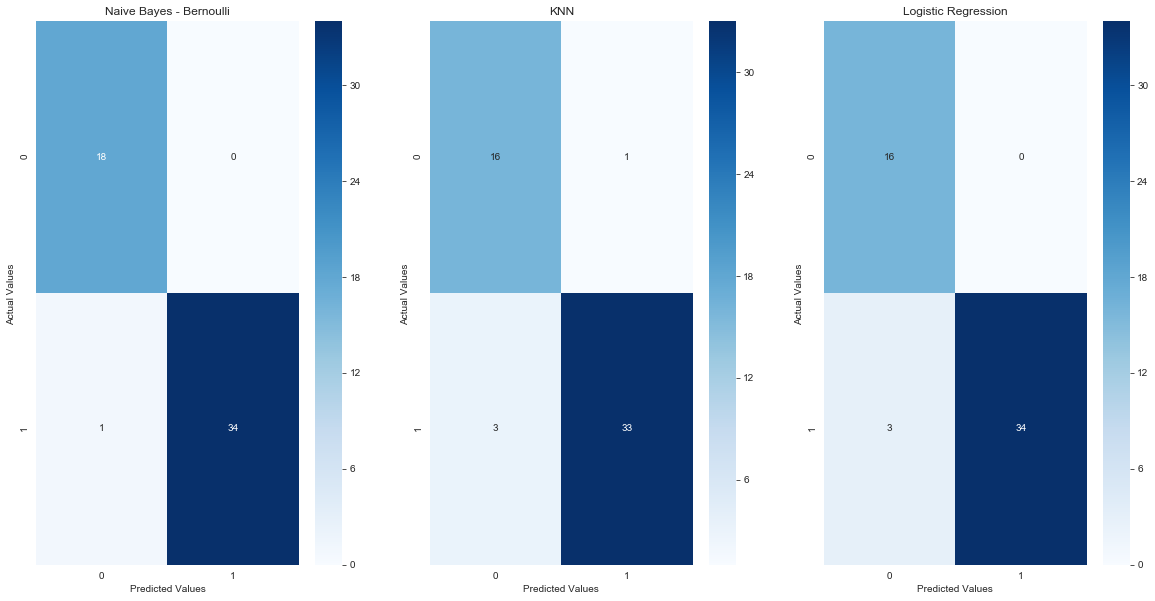

In [59]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 3)
sns.heatmap(clf_matrix0,annot=True,cmap='Blues',fmt='g',ax=ax[0])
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values ')
ax[0].set_ylim([2,0])
ax[0].set_title("Naive Bayes - Bernoulli")

sns.heatmap(clf_matrix1,annot=True,cmap='Blues',fmt='g',ax=ax[1])
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Actual Values ')
ax[1].set_ylim([2,0])
ax[1].set_title("KNN")

sns.heatmap(clf_matrix2,annot=True,cmap='Blues',fmt='g',ax=ax[2])
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Actual Values ')
ax[2].set_ylim([2,0])
ax[2].set_title("Logistic Regression")
plt.show()

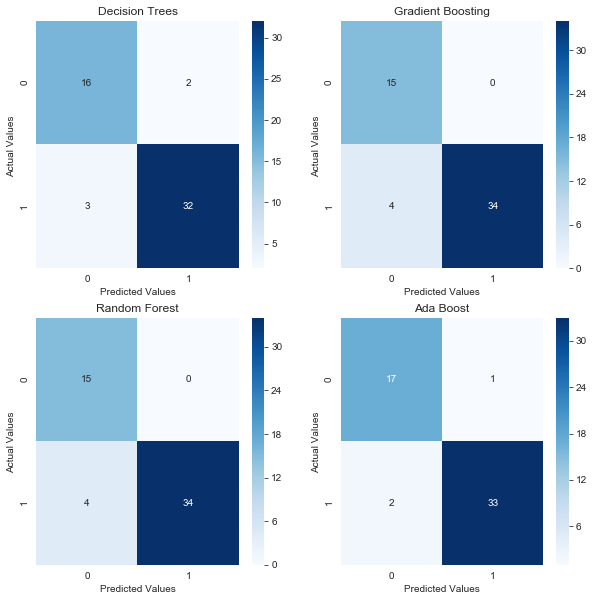

In [60]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2, 2)
sns.heatmap(clf_matrix3,annot=True,cmap='Blues',fmt='g',ax=ax[0][0])
ax[0][0].set_xlabel('Predicted Values')
ax[0][0].set_ylabel('Actual Values ')
ax[0][0].set_ylim([2,0])
ax[0][0].set_title("Decision Trees")

sns.heatmap(clf_matrix4,annot=True,cmap='Blues',fmt='g',ax=ax[0][1])
ax[0][1].set_xlabel('Predicted Values')
ax[0][1].set_ylabel('Actual Values ')
ax[0][1].set_ylim([2,0])
ax[0][1].set_title("Gradient Boosting")

sns.heatmap(clf_matrix5,annot=True,cmap='Blues',fmt='g',ax=ax[1][0])
ax[1][0].set_xlabel('Predicted Values')
ax[1][0].set_ylabel('Actual Values ')
ax[1][0].set_ylim([2,0])
ax[1][0].set_title("Random Forest")

sns.heatmap(clf_matrix6,annot=True,cmap='Blues',fmt='g',ax=ax[1][1])
ax[1][1].set_xlabel('Predicted Values')
ax[1][1].set_ylabel('Actual Values ')
ax[1][1].set_ylim([2,0])
ax[1][1].set_title("Ada Boost")

plt.show()

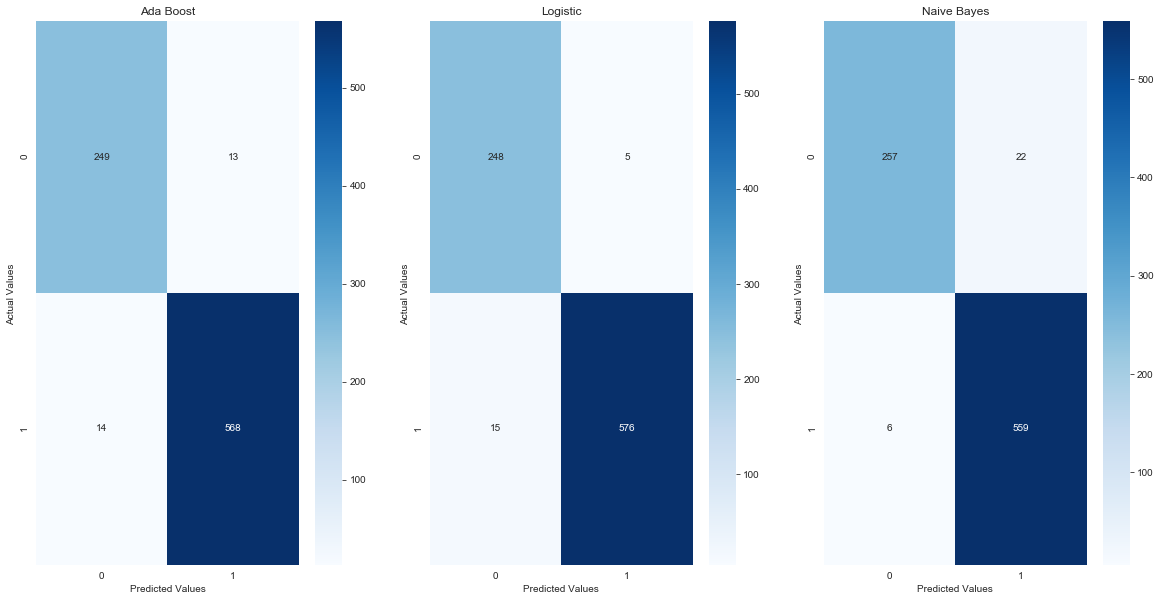

In [61]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 3)
sns.heatmap(clf_matrixa,annot=True,cmap='Blues',fmt='g',ax=ax[0])
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values ')
ax[0].set_ylim([2,0])
ax[0].set_title("Ada Boost")

sns.heatmap(clf_matrixb,annot=True,cmap='Blues',fmt='g',ax=ax[1])
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Actual Values ')
ax[1].set_ylim([2,0])
ax[1].set_title("Logistic")

sns.heatmap(clf_matrixc,annot=True,cmap='Blues',fmt='g',ax=ax[2])
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Actual Values ')
ax[2].set_ylim([2,0])
ax[2].set_title("Naive Bayes")
plt.show()

In [62]:
#Trimmed Mean
conditions = [
    (Toddler['Age_Mons'] >= 12) & (Toddler['Age_Mons'] < 24),
    (Toddler['Age_Mons'] >= 24) & (Toddler['Age_Mons'] <= 35),
    (Toddler['Age_Mons'] >= 36)
    ]
values = [1,2,3]
Toddler_age = np.select(conditions, values)
Toddler_age

print ("Toddler:",stats.trim_mean(Toddler_age, 0.1))
print ("Child:",stats.trim_mean(Child['age'], 0.1))
print ("Adolescent:",stats.trim_mean(Adolescent['age'], 0.1))
print ("Adult:",stats.trim_mean(Adult['age'], 0.1))

Toddler: 2.0402843601895735
Child: 6.076923076923077
Adolescent: 14.166666666666666
Adult: 27.97872340425532


In [63]:
proportion_Toddler = Toddler['Class/ASD Traits '].value_counts()
label_Toddler = proportion_Toddler.index
value_Toddler = (proportion_Toddler.values)/1054

proportion_Child = Child['Class/ASD'].value_counts()
label_Child = proportion_Child.index
value_Child = (proportion_Child.values)/292

proportion_Adolescent = Adolescent['Class/ASD'].value_counts()
label_Adolescent = proportion_Adolescent.index
value_Adolescent = (proportion_Adolescent.values)/104

proportion_Adult = Adult['Class/ASD'].value_counts()
label_Adult = proportion_Adult.index
value_Adult = (proportion_Adult.values)/704

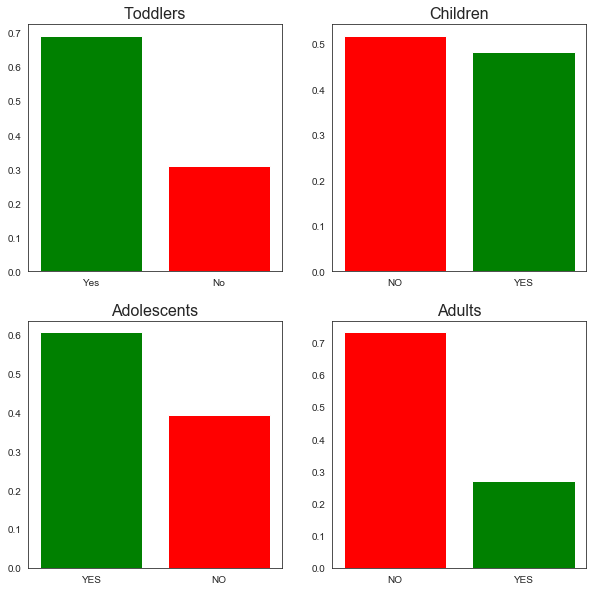

In [64]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2, 2)
ax[0][0].bar(x=label_Toddler,height=value_Toddler,color=['g','r'])
ax[0][0].set_title("Toddlers",loc="center",fontsize=16)
ax[0][1].bar(x=label_Child,height=value_Child,color=['r','g'])
ax[0][1].set_title("Children",loc="center",fontsize=16)
ax[1][0].bar(x=label_Adolescent,height=value_Adolescent,color=['g','r'])
ax[1][0].set_title("Adolescents",loc="center",fontsize=16)
ax[1][1].bar(x=label_Adult,height=value_Adult,color=['r','g'])
ax[1][1].set_title("Adults",loc="center",fontsize=16)
plt.show()

In [65]:
Toddler['Sex'] = Toddler['Sex'].replace({'m':'Male','f':'Female'})
proportion_Toddler = Toddler['Sex'].value_counts()
label_Toddler = proportion_Toddler.index
value_Toddler = proportion_Toddler.values

Child['gender'] = Child['gender'].replace({'m':'Male','f':'Female'})
proportion_Child = Child['gender'].value_counts()
label_Child = proportion_Child.index
value_Child = proportion_Child.values

Adolescent['gender'] = Adolescent['gender'].replace({'m':'Male','f':'Female'})
proportion_Adolescent = Adolescent['gender'].value_counts()
label_Adolescent = proportion_Adolescent.index
value_Adolescent = proportion_Adolescent.values

Adult['gender'] = Adult['gender'].replace({'m':'Male','f':'Female'})
proportion_Adult = Adult['gender'].value_counts()
label_Adult = proportion_Adult.index
value_Adult = proportion_Adult.values

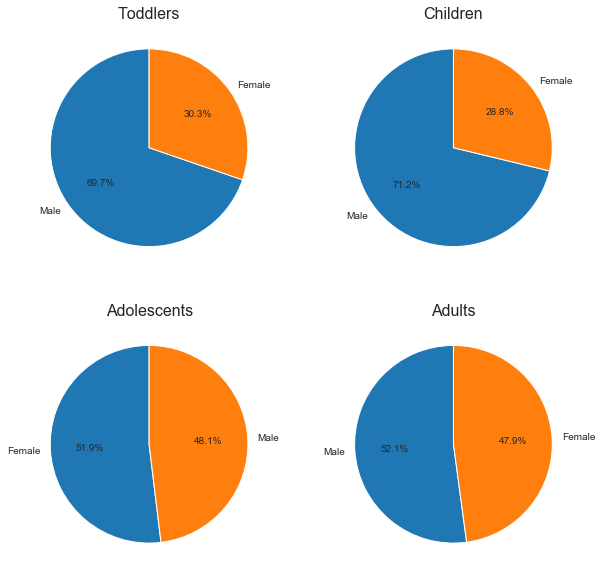

In [66]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2, 2)
ax[0][0].pie(value_Toddler,labels=label_Toddler,autopct='%1.1f%%',startangle=90)
ax[0][0].set_title("Toddlers",loc="center",fontsize=16)
ax[0][1].pie(value_Child,labels=label_Child,autopct='%1.1f%%',startangle=90)
ax[0][1].set_title("Children",loc="center",fontsize=16)
ax[1][0].pie(value_Adolescent,labels=label_Adolescent,autopct='%1.1f%%',startangle=90)
ax[1][0].set_title("Adolescents",loc="center",fontsize=16)
ax[1][1].pie(value_Adult,labels=label_Adult,autopct='%1.1f%%',startangle=90)
ax[1][1].set_title("Adults",loc="center",fontsize=16)
plt.show()

In [67]:
proportion_Toddler = Toddler['Jaundice'].value_counts()
label_Toddler = proportion_Toddler.index
value_Toddler = proportion_Toddler.values

proportion_Child = Child['jundice'].value_counts()
label_Child = proportion_Child.index
value_Child = proportion_Child.values

proportion_Adolescent = Adolescent['jundice'].value_counts()
label_Adolescent = proportion_Adolescent.index
value_Adolescent = proportion_Adolescent.values

proportion_Adult = Adult['jundice'].value_counts()
label_Adult = proportion_Adult.index
value_Adult = proportion_Adult.values

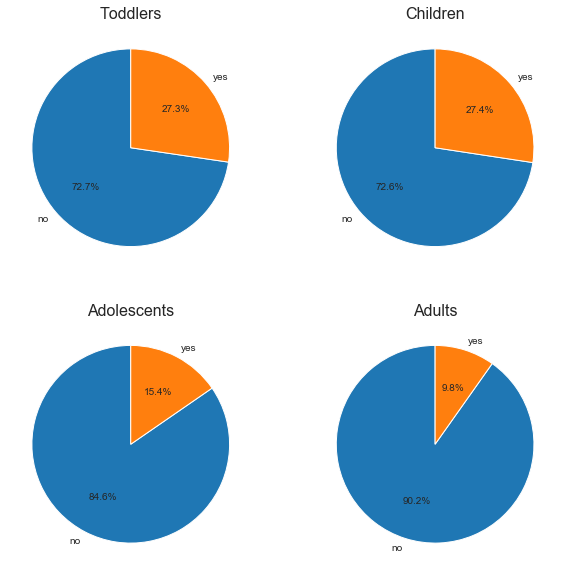

In [68]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2, 2)
ax[0][0].pie(value_Toddler,labels=label_Toddler,autopct='%1.1f%%',startangle=90)
ax[0][0].set_title("Toddlers",loc="center",fontsize=16)
ax[0][1].pie(value_Child,labels=label_Child,autopct='%1.1f%%',startangle=90)
ax[0][1].set_title("Children",loc="center",fontsize=16)
ax[1][0].pie(value_Adolescent,labels=label_Adolescent,autopct='%1.1f%%',startangle=90)
ax[1][0].set_title("Adolescents",loc="center",fontsize=16)
ax[1][1].pie(value_Adult,labels=label_Adult,autopct='%1.1f%%',startangle=90)
ax[1][1].set_title("Adults",loc="center",fontsize=16)
plt.show()


In [69]:
conditions = [
    (Adult['age'] < 21),
    (Adult['age'] >= 21) & (Adult['age'] < 31),
    (Adult['age'] >= 31) & (Adult['age'] < 41),
    (Adult['age'] >= 41) & (Adult['age'] < 51),
    (Adult['age'] >= 51) & (Adult['age'] < 61),
    (Adult['age'] >= 61)
    ]

# create a list of the values we want to assign for each condition
values = ['17-20', '21-30', '31-40', '41-50','51-60','Above 60']

# create a new column and use np.select to assign values to it using our lists as arguments
Adult['Age Group'] = np.select(conditions, values)

conditions = [
    (Toddler['Age_Mons'] < 12),
    (Toddler['Age_Mons'] >= 12) & (Toddler['Age_Mons'] < 24),
    (Toddler['Age_Mons'] >= 24) & (Toddler['Age_Mons'] <= 35),
    (Toddler['Age_Mons'] >= 36)
    ]

# create a list of the values we want to assign for each condition
values = ['Less than 1 year', '1 year', '2 years', '3 years']

# create a new column and use np.select to assign values to it using our lists as arguments
Toddler['Age_Years'] = np.select(conditions, values)

In [70]:
proportion_Toddler = Toddler['Age_Years'].value_counts()
label_Toddler = proportion_Toddler.index
value_Toddler = proportion_Toddler.values

proportion_Child = Child['age'].value_counts()
label_Child = proportion_Child.index
value_Child = proportion_Child.values

proportion_Adolescent = Adolescent['age'].value_counts()
label_Adolescent = proportion_Adolescent.index
value_Adolescent = proportion_Adolescent.values

proportion_Adult = Adult['Age Group'].value_counts()
label_Adult = proportion_Adult.index
value_Adult = proportion_Adult.values

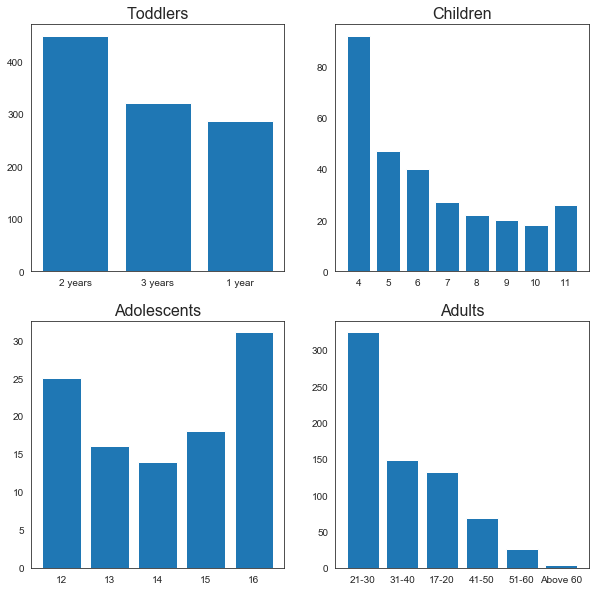

In [71]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2, 2)
ax[0][0].bar(x=label_Toddler,height=value_Toddler)
ax[0][0].set_title("Toddlers",loc="center",fontsize=16)
x_ticks = [4,5,6,7,8,9,10,11]
ax[0][1].bar(x=label_Child,height=value_Child)
ax[0][1].set_xticks(x_ticks, minor=False)
ax[0][1].set_title("Children",loc="center",fontsize=16)
ax[1][0].bar(x=label_Adolescent,height=value_Adolescent)
ax[1][0].set_title("Adolescents",loc="center",fontsize=16)
ax[1][1].bar(x=label_Adult,height=value_Adult)
ax[1][1].set_title("Adults",loc="center",fontsize=16)
plt.show()

In [72]:
Toddler.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ',
       'Age_Years'],
      dtype='object')

Sex                Female  Male
Class/ASD Traits               
No                    125   201
Yes                   194   534


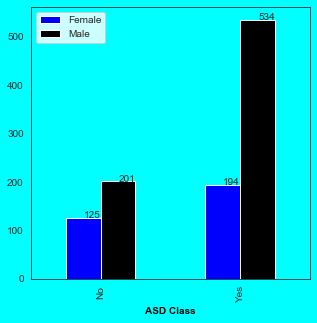

In [73]:
plt.rcParams['figure.facecolor'] = 'cyan'
plt.rcParams["figure.figsize"] = (5,5)
cross_tab1 = pd.crosstab(Toddler['Class/ASD Traits '],Toddler.Sex)
print (cross_tab1)
cross_tab1.plot(kind='bar', color = ['blue','black'])
plt.xlabel("ASD Class",fontweight='bold',color='black')
ax = plt.axes() 

# Set Inner Color

ax.set_facecolor('cyan') 
ax.legend(['Female','Male'])

for p in ax.patches:
    text = '{}'.format(p.get_height())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(text, (x, y),ha='right')

In [74]:
cross_tab1

Sex,Female,Male
Class/ASD Traits,,
No,125,201
Yes,194,534
